# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [5]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***

<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) models the relationship between independent variables $X$ (also called explanatory variables, features, predictors) and a dependent variable $Y$.  
The simplest case uses one independent variable:

$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$

where $\varepsilon$ is an unobservable random error term. In linear regression,  
$\varepsilon$ is assumed to be normally distributed with mean 0, and the errors are i.i.d. (independent and identically distributed).

* $\beta_0$ is the intercept (the expected value of $Y$ when all $X$ are 0).  
* $\beta_1$ is the slope (expected change in $Y$ for a one-unit increase in $X$).

The model expresses the *conditional mean* of $Y$ given $X$:

$$
y = f(x) = E(Y \mid X = x)
$$

![conditional mean](images/conditionalmean.png)

The estimated coefficients are written with hats:

$$
\hat{\beta}_0,\ \hat{\beta}_1
$$

Predicted values from the fitted model are:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1
$$

For multiple linear regression:

$$
Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \varepsilon
$$

---

### Estimating $\hat{\beta}$: Least Squares
***

Least squares estimates the coefficients by minimizing the squared residuals:

$$
\mathcal{L} = \sum_{i=1}^N \varepsilon_i^2 
= \sum_{i=1}^N (y_i - \hat{y}_i)^2
= \sum_{i=1}^N \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2
$$

where $N$ is the number of observations and  
$\varepsilon_i = y_i - \hat{y}_i$.

---

### Estimating the intercept $\hat{\beta}_0$ (simple linear model)

We minimize the loss function with respect to $\hat{\beta}_0$:

$$
\begin{aligned}
\frac{\partial \mathscr{L}}{\partial \hat{\beta}_0}
&= \frac{\partial}{\partial \hat{\beta}_0} 
\sum_{i=1}^N \left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right) \\
&= -2 \left[ \sum_{i=1}^N y_i - N\hat{\beta}_0 - \hat{\beta}_1 \sum_{i=1}^N x_i \right] \\
&= 0 \\
\Rightarrow\quad
N\hat{\beta}_0 
&= \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
\hat{\beta}_0
&= \frac{1}{N} \sum_{i=1}^N y_i 
- \hat{\beta}_1 \frac{1}{N} \sum_{i=1}^N x_i \\
\hat{\beta}_0
&= \bar{y} - \hat{\beta}_1 \bar{x}
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial \mathscr{L}}{\partial \hat{\beta}_0}
&= \frac{\partial}{\partial \hat{\beta}_0} \sum_{i=1}^N \epsilon_i^2 \\
&= \frac{\partial}{\partial \hat{\beta}_0} \sum_{i=1}^N (y_i - \hat{y}_i)^2 \\
&= \frac{\partial}{\partial \hat{\beta}_0} \sum_{i=1}^N \left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right)
\quad\text{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \sum_{i=1}^N y_i - N\hat{\beta}_0 - \hat{\beta}_1 \sum_{i=1}^N x_i \right] \\
&= 2 \left[ N\hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \\
& N\hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{aligned}
$$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$$
\frac{\partial \mathscr{L}}{\partial \hat{\beta}_1}
= \frac{\partial}{\partial \hat{\beta}_1} \sum_{i=1}^N \varepsilon_i^2
$$

$$
= \frac{\partial}{\partial \hat{\beta}_1}
\sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

$$
= \frac{\partial}{\partial \hat{\beta}_1}
\sum_{i=1}^N \left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right)^2
$$

$$
= 2 \sum_{i=1}^N
\left( y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) \right)(-x_i)
\quad\text{(by chain rule)}
$$

$$
= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right)
$$

$$
= -2 \sum_{i=1}^N x_i y_i
+ 2\hat{\beta}_0\sum_{i=1}^N x_i
+ 2\hat{\beta}_1 \sum_{i=1}^N x_i^2
$$

Set the derivative equal to zero:

$$
-2 \sum_{i=1}^N x_i y_i
+ 2\hat{\beta}_0\sum_{i=1}^N x_i
+ 2\hat{\beta}_1 \sum_{i=1}^N x_i^2
= 0
$$

Substitute  
\(\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}\):

$$
-2\sum_{i=1}^N x_i y_i
+ 2(\bar{y} - \hat{\beta}_1 \bar{x}) \sum_{i=1}^N x_i
+ 2\hat{\beta}_1 \sum_{i=1}^N x_i^2 = 0
$$

Simplify:

$$
\hat{\beta}_1
\left( \sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i \right)
=
\sum_{i=1}^N x_i y_i - \bar{y}\sum_{i=1}^N x_i
$$

Solve for \(\hat{\beta}_1\):

$$
\hat{\beta}_1
= \frac{\sum_{i=1}^N x_i y_i - \bar{y}\sum_{i=1}^N x_i}
       {\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i}
$$

Using identities  
\(\sum x_i = n\bar{x}\), \(\sum y_i = n\bar{y}\):

$$
\boxed{
\hat{\beta}_1 =
\frac{\sum_{i=1}^N x_i y_i - n\bar{x}\bar{y}}
     {\sum_{i=1}^N x_i^2 - n\bar{x}^2}
}
$$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [1]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [2]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [3]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

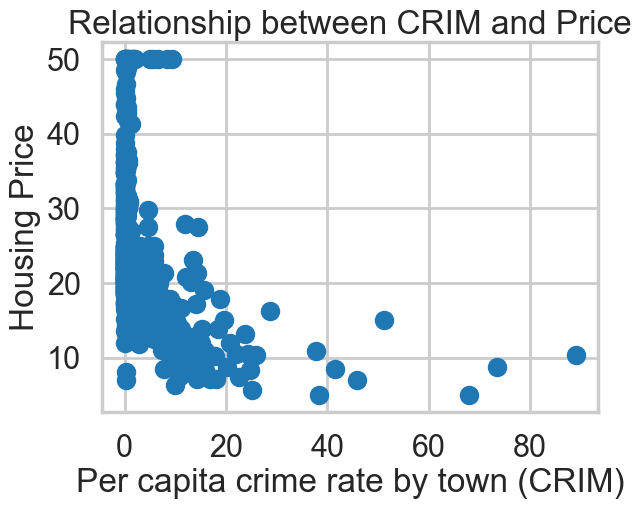

In [6]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship
# This is a non-linear negative relationship.  That said, I don't think the negative relationship is very strong.  This type of plot can also happend when you have two independent variables
# that both vary widely with rare large values.

Text(0.5, 1.0, 'Relationship between Room Count and Price')

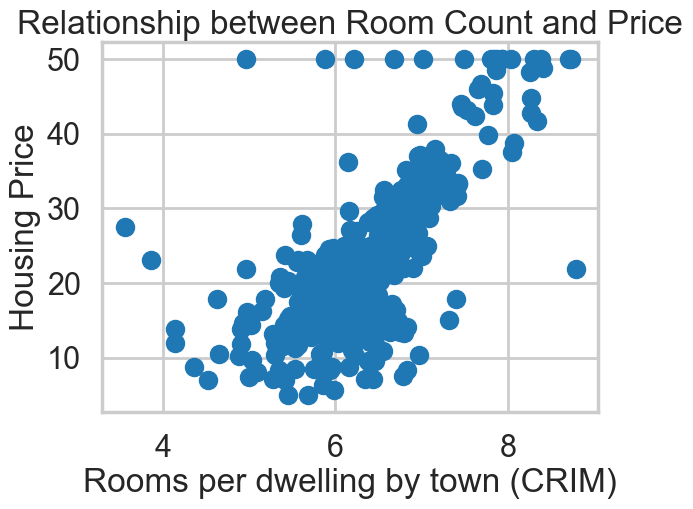

In [7]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Rooms per dwelling by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between Room Count and Price")

Text(0.5, 1.0, 'Relationship between Pupil/Teacher ratio and Price')

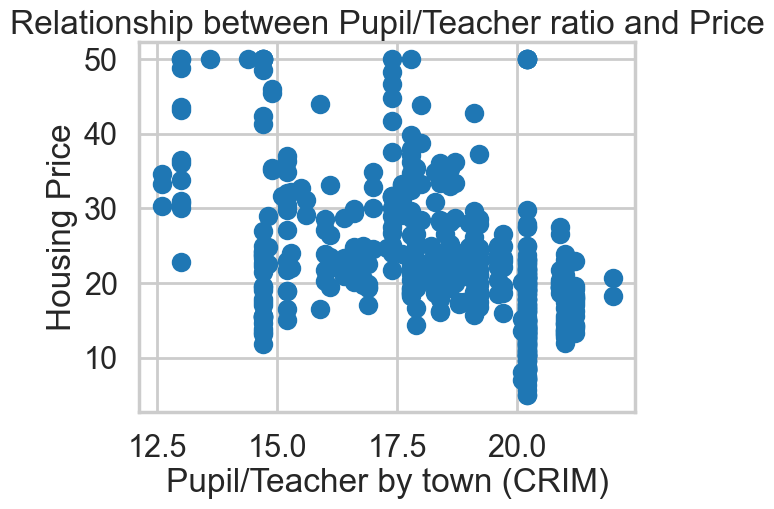

In [8]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil/Teacher by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil/Teacher ratio and Price")

In [15]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

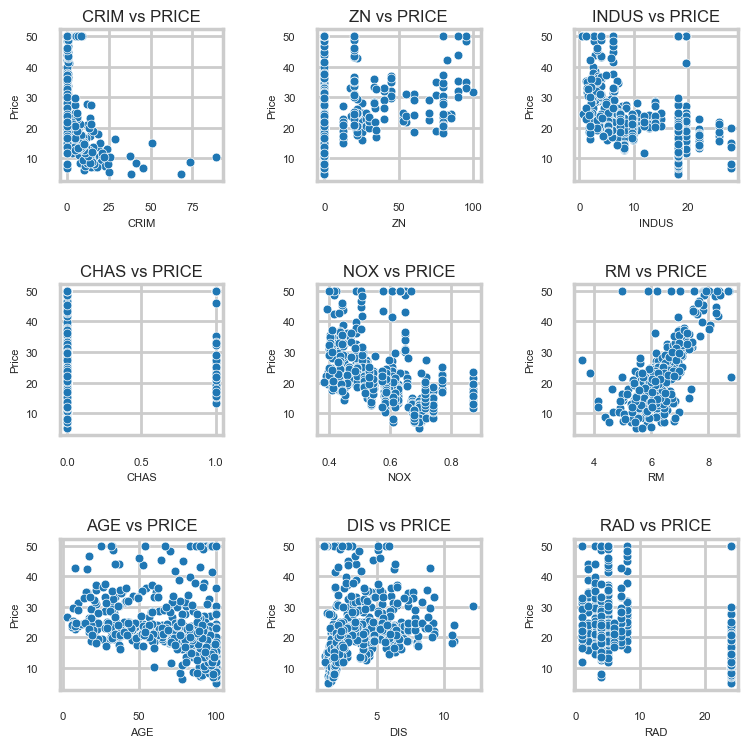

In [24]:
# your turn: create some other scatter plots
fig, axes = plt.subplots(3, 3, figsize=(8,8))

# Flatten axes for easy looping
axes = axes.flatten()
vars_to_plot = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
for ax, v in zip(axes, vars_to_plot):
    sns.scatterplot(data=bos, x=v, y='PRICE', ax=ax, s=40)
    ax.set_title(f'{v} vs PRICE', fontsize=12)
    ax.set_xlabel(v, fontsize=8)
    ax.set_ylabel("Price", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# If there are empty cells, hide them
for i in range(len(vars_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

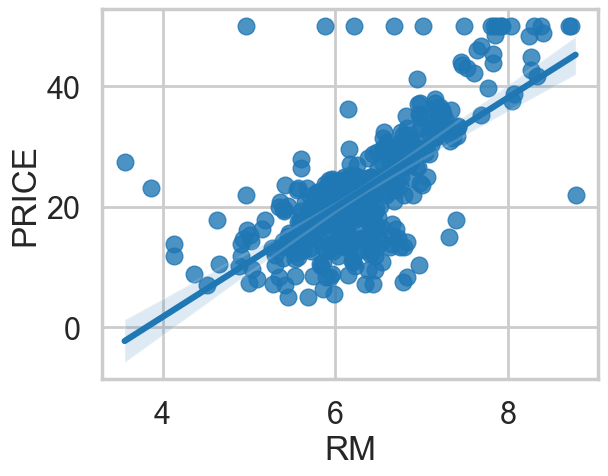

In [25]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


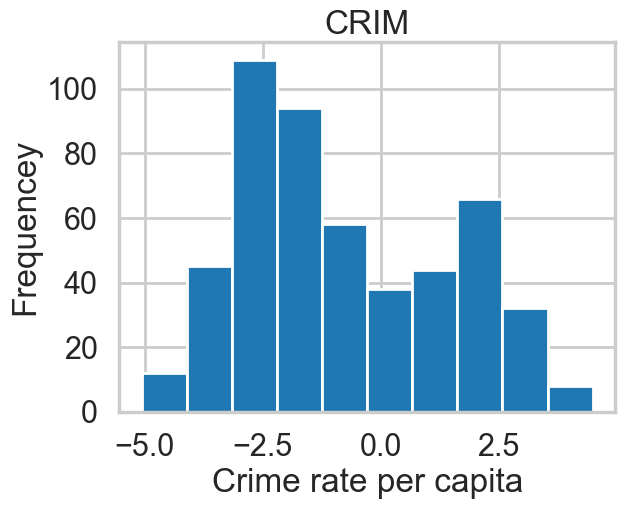

In [ ]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita", )
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

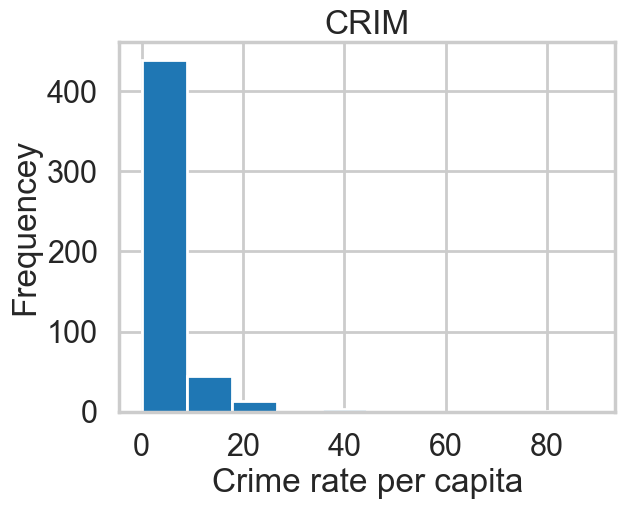

In [ ]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()
# The purpose of taking the log of the CRIM data is to decrease the apparent variability. The data has a huge spread with a few large values that make looking for pattern challenging.

Text(0.5, 1.0, 'Relationship between Pupil/Teacher ratio and Room Count')

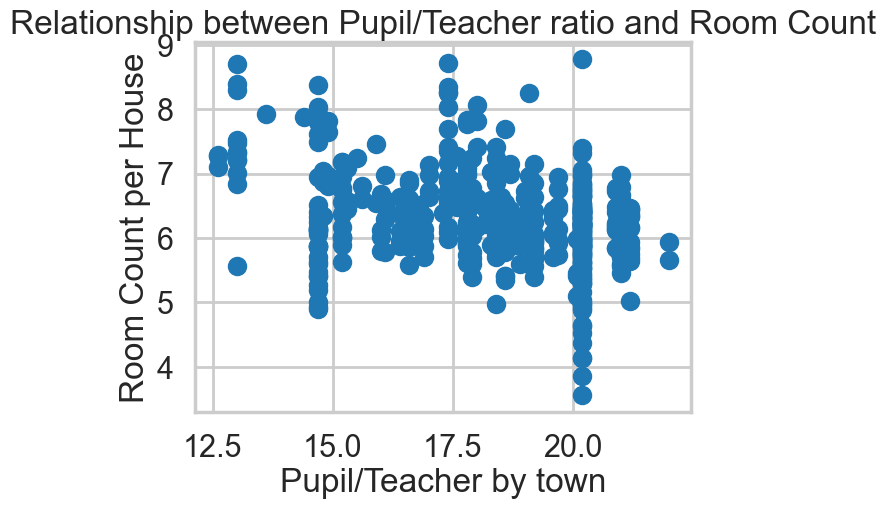

In [28]:
# I don't think I can plot of histogram of two variables against each other, so I'll use a scatter plot.
plt.scatter(bos.PTRATIO, bos.RM)
plt.xlabel("Pupil/Teacher by town")
plt.ylabel("Room Count per House")
plt.title("Relationship between Pupil/Teacher ratio and Room Count")

Text(0.5, 1.0, 'Relationship between Room Count and Lot Size')

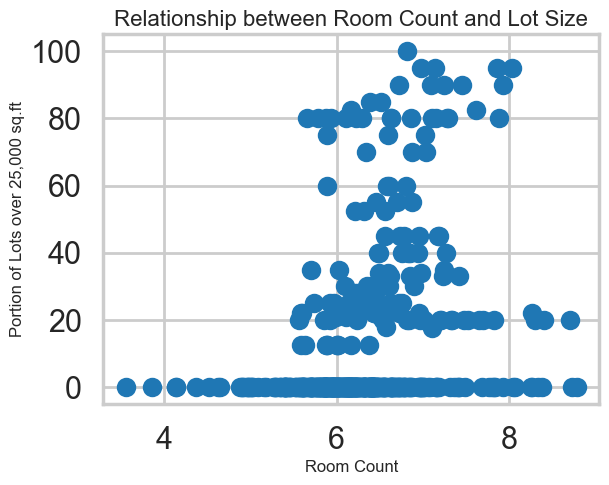

In [36]:
plt.scatter(bos.RM, bos.ZN)
plt.xlabel("Room Count", fontsize = 12)
plt.ylabel("Portion of Lots over 25,000 sq.ft", fontsize = 12)
plt.title("Relationship between Room Count and Lot Size", fontsize = 16)

Text(0.5, 1.0, 'Distance from Employment Centers and Lot Size')

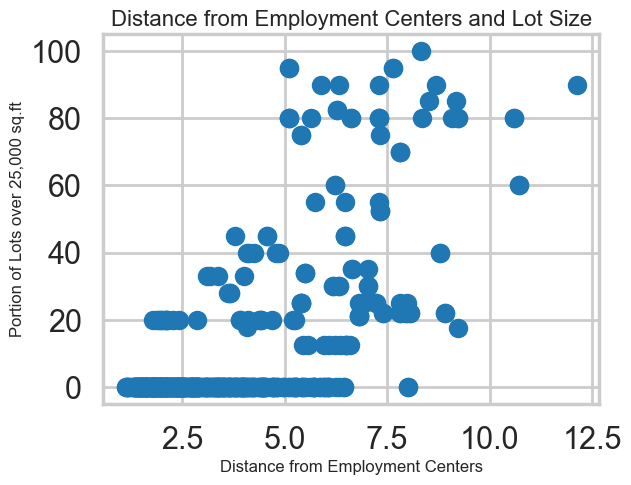

In [35]:
plt.scatter(bos.DIS, bos.ZN)
plt.xlabel("Distance from Employment Centers", fontsize = 12)
plt.ylabel("Portion of Lots over 25,000 sq.ft", fontsize = 12)
plt.title("Distance from Employment Centers and Lot Size", fontsize = 16)

Text(0.5, 1.0, 'Relationship between Lot Size and Room Count')

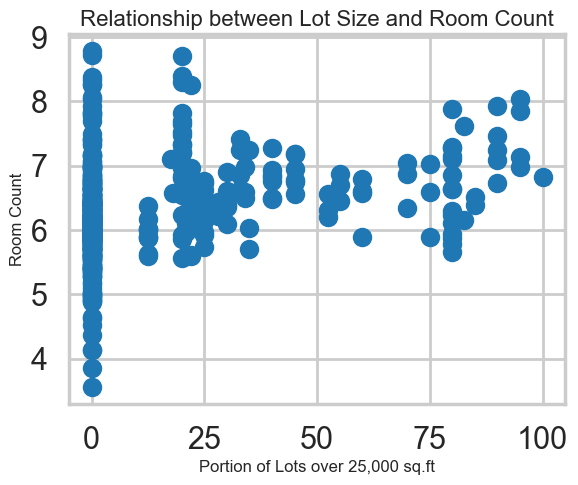

In [ ]:
plt.scatter(bos.ZN, bos.RM)
plt.xlabel("Portion of Lots over 25,000 sq.ft", fontsize = 12)
plt.ylabel("Room Count", fontsize = 12)
plt.title("Relationship between Lot Size and Room Count", fontsize = 16)

Text(0.5, 1.0, 'Distance from Employment Centers and Room Count')

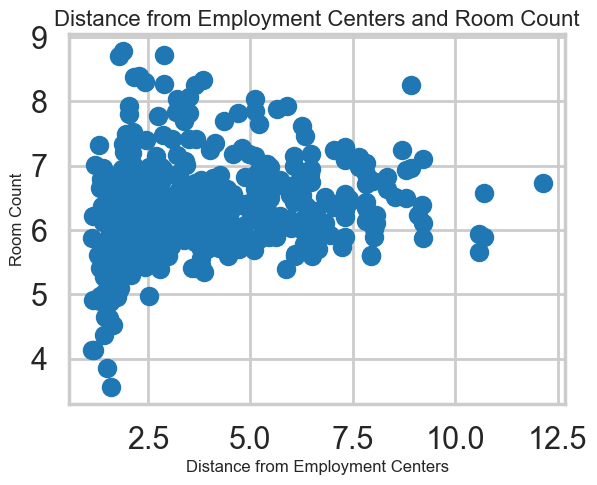

In [39]:
plt.scatter(bos.DIS, bos.RM)
plt.xlabel("Distance from Employment Centers", fontsize = 12)
plt.ylabel("Room Count", fontsize = 12)
plt.title("Distance from Employment Centers and Room Count", fontsize = 16)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [40]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           2.49e-74
Time:                        17:58:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Prediction vs Actual House Prices')

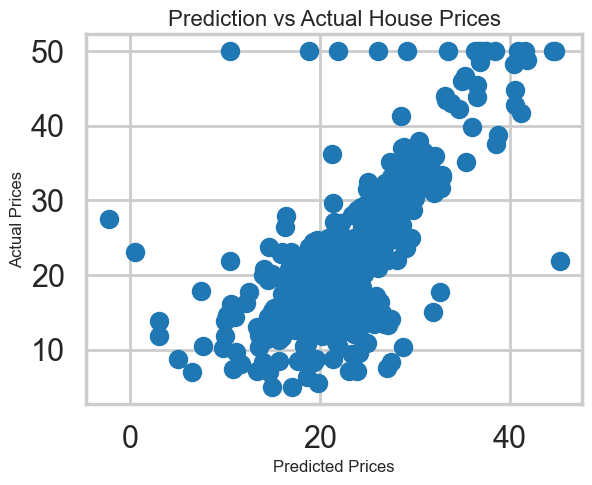

In [42]:
# your turn
plt.scatter(x=m.fittedvalues, y=bos.PRICE)
plt.xlabel("Predicted Prices", fontsize = 12)
plt.ylabel("Actual Prices", fontsize = 12)
plt.title("Prediction vs Actual House Prices", fontsize = 16)

### Fitting Linear Regression using `sklearn`


In [43]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [49]:
# Look inside lm object
# lm.<tab>


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [47]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [53]:
# your turn

# To not fit the intercept I would do the following (or set fit_intercept=False in LinearRegression).  
# However, I don't recommend doing this as houses are never priced at 0.  
# Even if the explanatory variables are at their lowest (aka 0), the houses would still have a price (aka intercept.)
m2 = ols('PRICE ~ 0 + RM',bos).fit()
print(m2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):                   3.74e-256
Time:                        18:19:28   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Question 2
# I don't think it would be enough that the residuals are normally distributed, as they could still be dependent on other variables and be normally distributed. 
# Independence and normality seem like difference characteristics.

# After I wrote that answer, I looked it up used this source for the following answer(https://stats.stackexchange.com/questions/248615/what-is-the-difference-between-normal-and-iid#:~:text=If%20they%20are%20independent%20and,to%20whether%20they%20are%20normal.)

# In order to be IID, the residuals must be independent, have constant variance and be normally distibuted.  It is not enough to say that they are all normally distributed as 
# normal distributions can have different variances and therefore not be identicle.  In addition, normality does not prove independence as residuals from two dependent variables 
# can still both be normally distributed.

In [ ]:
#Question 3
# False
# I'm interpreting $Y$ as the dependent variable.  It does not have to be normal - it's residuals do. 
# Here is a source that agrees with me (I think): https://stats.stackexchange.com/questions/148803/how-does-linear-regression-use-the-normal-distribution 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [54]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508985


In [55]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [56]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [57]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([-2.25801069,  2.49237998,  7.24277066, 11.99316134, 16.74355201,
        21.49394269, 26.24433337, 30.99472405, 35.74511472, 40.4955054 ,
        45.24589608]),
 <BarContainer object of 10 artists>)

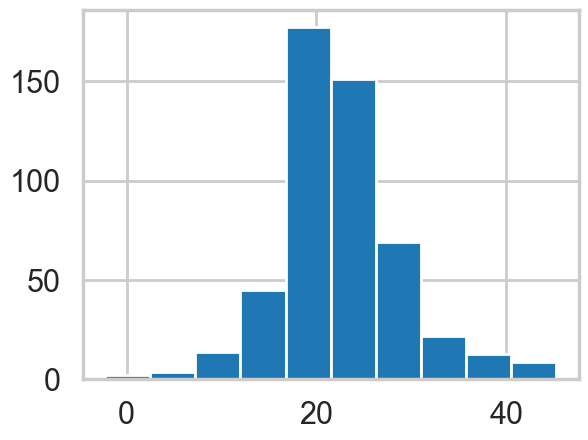

In [ ]:
# your turn
plt.hist(m.fittedvalues)
# The predicted prices look approximatly normal (although probably not close enough to pass a statistical test).  The center is around $20,000 and the spread goes essentialy from 
# 0 to $45,000.  There are no outliers persay, but there are some very strange data points.  The lowest house price is -2258$, which is impossible. I addition, I would argue that 
# anything below $5000 is probably not possible (or some other cutoff that makes sense for 1970).  Furthermore, there are multiple houses for $50,000 in the original dataset which 
# are clealry not accuratly predicted by this model.  I don't know what to do about these issues other than try to build a better model - what if we just shift everything by 
# $5000 to the right?

Text(0.5, 1.0, 'Prediction vs Actual House Prices')

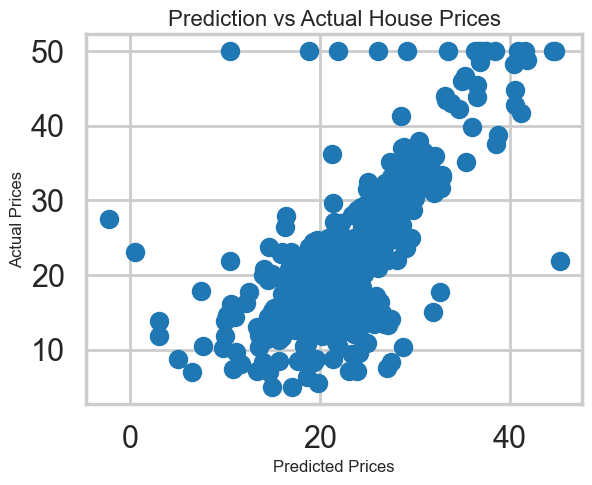

In [59]:
#Question 2
plt.scatter(x=m.fittedvalues, y=bos.PRICE)
plt.xlabel("Predicted Prices", fontsize = 12)
plt.ylabel("Actual Prices", fontsize = 12)
plt.title("Prediction vs Actual House Prices", fontsize = 16)

In [ ]:
#Question 3
# I really don't feel qualified to judge the difference between statsmodels and scikit-learn, I haven't used either of them yet to know.  
# statsmodels seems to have the advantage of the summary() table, which was very helpful.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [60]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [61]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064765


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [ ]:
m3 = ols('PRICE ~ PTRATIO',bos).fit()
m3.summary()
# Intercept of 62.3 means that a pupil/teacher ratio of 0 would make the house 62,000$.  Of couse this is theoretical since that P/T ratio cannot exist.
# The coefficient of -2.15 means for every ~2 additional students the teacher has, the house price goes down by 1 unit (1000$).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.61e-34
Time:                        18:57:10   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The R2 is 0.258, which means that 25.8% of the variation in house price can be explained by the P/T ratio.

# The F-statistic is 175.1, which is large.  This means that this regression is much better at predicting housing prices than just the mean of the PTRatio would be.

# The F-statistic is the square of the t value for the coefficient.
np.sqrt(175.1)

np.float64(13.232535660258014)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# your turn
m4 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m4.summary()

# The F-statistic is 245.2.  This tells me that this model is better at prediciting house prices than the previous model that only used PTRATIO alone. 
# However, it has a lower F-statistic that the first model with looked only at RM (F-statistic ~ 471).  This indicates that addint CRIM AND PTRATIO did not improve the model in terms of overall significance.

# R2 is 0.594, which means that 59.4% of the variation in the houseing proces is explained by this model.  This is the highest R2 value of any of the models we have looked at yet.
# I'm not sure how to interpret the lower F-statistic and higher R2 for this model compared to RM alone - different models "win" based on each of these statical metrics.

# The number of rooms in the house (RM) is clearly the most significant predictor of house price in this model, as it has the largest coefficient.  
# It seems that this variabe is the main predictor, with Crime Rate (CRIM) and pupil/teacher ratio adding much smaller modifications to the prediction.  This makes sense, since the 
# number of rooms is defining characteristic of the house that will not change. CRIM and PTRATIO are characteristics of the environment that can change over time, and would logically be 
# less influential on the price of a house.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           6.15e-98
Time:                        19:16:33   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [ ]:
m5 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + ZN', bos).fit()
m5.summary()
# Adding DIS and ZN made this model is worse that m4.  This is becuse the F-statistic when down compared to m4 and the AIC stayed essentially the same (3232 for m4 vs 3230 for m5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           9.87e-97
Time:                        19:45:02   Log-Likelihood:                -1609.2
No. Observations:                 506   AIC:                             3230.
Df Residuals:                     500   BIC:                             3256.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5982      4.059     -0.886      0.376     -11.573       4.376
CRIM          -0.2180      0.034     -6.359      0.000      -0.285      -0.151
RM             7.2155      0.408     17.693      0.000       6.414       8.017
PTRATIO       -0.9700      0.139     -6.954      0.000      -1.244      -0.696
DIS           -0.2528      0.177     -1.425      0.155      -0.601       0.096
ZN             0.0381      0.016      2.345      0.019       0.006       0.070
==============================================================================
Omnibus:                      226.792   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1870.819
Skew:                           1.754   Prob(JB):                         0.00
Kurtosis:                      11.742   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#I'm going to do an intermediate model which I will compare to m (RM only) and m4 (CRIM + PTRATIO +CRIM) out of curiosity.  
m6 = ols('PRICE ~ RM + PTRATIO', bos).fit()
m6.summary()
#This model is in between m and m4 for both F-statitic (m is still the highest) and R2 (m4 is still the highest).  One could argue that this model (m6) is the best compromise since 
# the R2 between m4 and m6 are so close, which the F-statistic in m6 is much higher that m4 (321 vs 245).  The AIC is also slightly higher than m4 (3270 vs 3232) but lower than m (3270, vs 3350).
# Altogether, I'm seeing that these different metrics don't always agree on the best model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     321.7
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.04e-90
Time:                        19:52:09   Log-Likelihood:                -1631.8
No. Observations:                 506   AIC:                             3270.
Df Residuals:                     503   BIC:                             3282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5612      4.189     -0.611      0.541     -10.791       5.669
RM             7.7141      0.414     18.650      0.000       6.901       8.527
PTRATIO       -1.2672      0.134     -9.440      0.000      -1.531      -1.003
==============================================================================
Omnibus:                      183.160   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.731
Skew:                           1.368   Prob(JB):                    2.52e-305
Kurtosis:                      10.684   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
bos['CRIM_log'] = np.log(bos['CRIM'])
m7 = ols('PRICE ~ RM + PTRATIO + CRIM_log', bos).fit()
m7.summary()
#the log of CRIM seems like a better predictor than CRIM.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     242.3
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           3.42e-97
Time:                        19:58:54   Log-Likelihood:                -1613.7
No. Observations:                 506   AIC:                             3235.
Df Residuals:                     502   BIC:                             3252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9943      4.065     -1.229      0.220     -12.981       2.993
RM             7.2276      0.407     17.743      0.000       6.427       8.028
PTRATIO       -1.0043      0.137     -7.352      0.000      -1.273      -0.736
CRIM_log      -0.8198      0.134     -6.102      0.000      -1.084      -0.556
==============================================================================
Omnibus:                      270.329   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2724.116
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      13.549   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [ ]:
# Your turn.
m = ols('PRICE ~ RM',bos).fit()


Text(0.5, 0, 'Residuals')

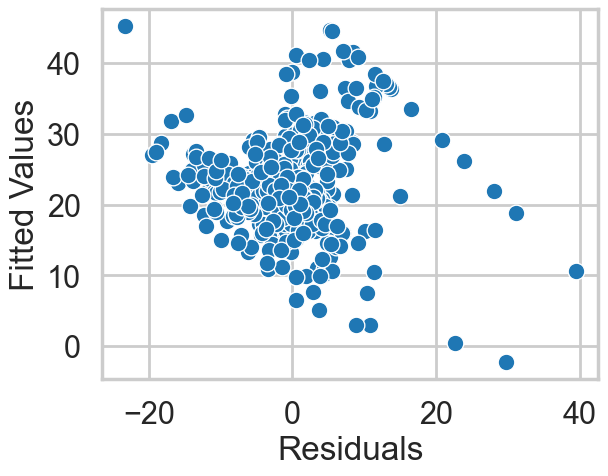

In [ ]:
# Construct a fitted values versus residuals plot.
sns.scatterplot(x=m.resid, y=m.fittedvalues)
plt.ylabel('Fitted Values')
plt.xlabel('Residuals')
#The residuals are grouped around 0 (which seems right), but there are some really large residuals that could not be taken into account by this model.  
# I would guess that the residuals are normally distributed and don't violate the model, but these outlier might be an issue.

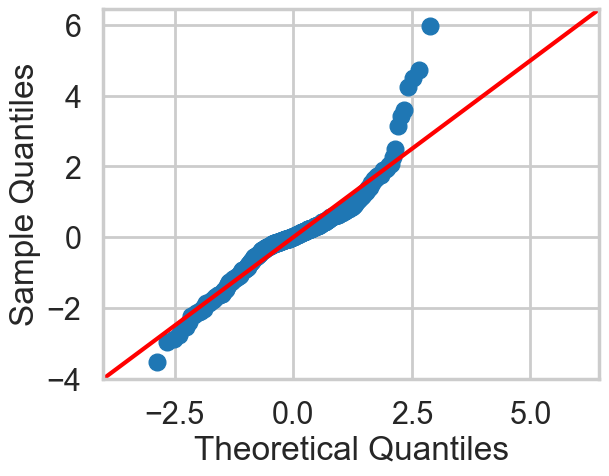

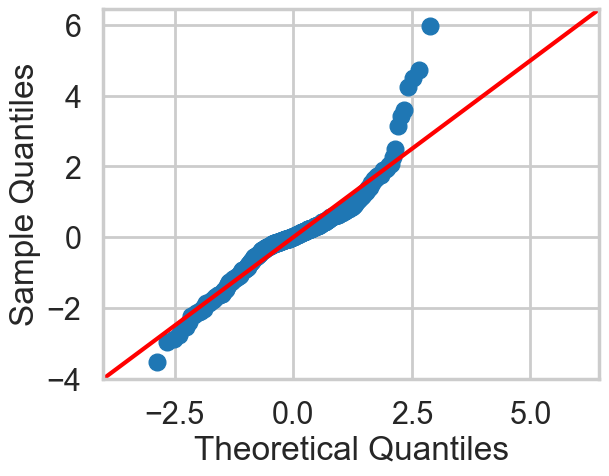

In [ ]:
# Construct a quantile plot of the residuals.
sm.qqplot(m.resid, line='45', fit=True)
# The residuals look pretty normally distributed (on the red line) except for a tail at the top that look like outliers and deviate from the diagonal.  

# The quantile plot is much easier to interpret that the residual vs fitted plot.  I come to similar conclusions, but the quantile plot has the advantage of being much clearer to me.

In [ ]:
# Identify any outliers (if any) in your model and write a story describing what these outliers might represent. - I'm assuming this means residual outlier as opposed to price outliers.
resid_Q1, resid_Q3 = np.percentile(m.resid, [25, 75])
resid_IQR = resid_Q3 - resid_Q1
resid_upper_IQR = resid_Q3 + 1.5*resid_IQR
resid_upper_IQR
# This upper limit seem way too low, let's try 2 or 3 standard deviation above the mean

np.float64(11.285046438224473)

In [110]:
resid_mean = np.mean(m.resid)
resid_std = np.std(m.resid)
resid_upper_std = resid_mean + 3*resid_std
resid_lower_std = resid_mean - 3*resid_std
resid_upper_std, resid_lower_std

(np.float64(19.809214167667708), np.float64(-19.80921416766766))

In [ ]:
# The outlier cutoff of 19.81 makes more sense to me.  I'll round up to 20 and identify which rows we're talking about.
bos['m_residual'] = m.resid
bos_large_res = bos[(bos['m_residual'] > 20) | (bos['m_residual'] < -20)]
bos_large_res
# These houses are all very old, have a RAD of 24 and most are expensive.  Let's look at a histogram of AGE  and RAD and see how these compare to the distribution of all the data.
# These are also all from the same part of the table - the index values are in a row.  I don't know what to say about that.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CRIM_log,m_residual,m_leverage
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,1.245387,-23.345896,0.026953
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,1.516417,29.758011,0.031732
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,2.604333,22.609174,0.025499
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,1.588872,39.433139,0.008909
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,1.735186,23.841226,0.002613
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,1.877748,20.810224,0.004122
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,2.222708,28.091911,0.001995
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,2.112302,31.195731,0.002649


Text(0.5, 1.0, 'Distribution of House Age')

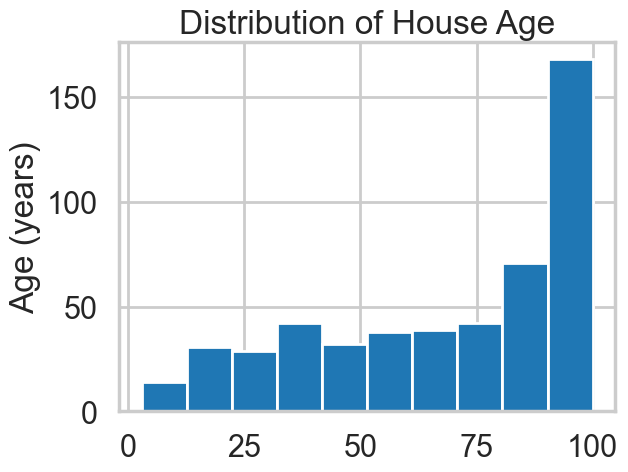

In [ ]:
plt.hist(bos['AGE'])
plt.ylabel('Age (years)')
plt.title('Distribution of House Age')
# OK, there are LOTS of old houses in Boston. How many are old and expensive?

Text(0.5, 1.0, 'Distribution of Index of Accessibility to Radial Highways')

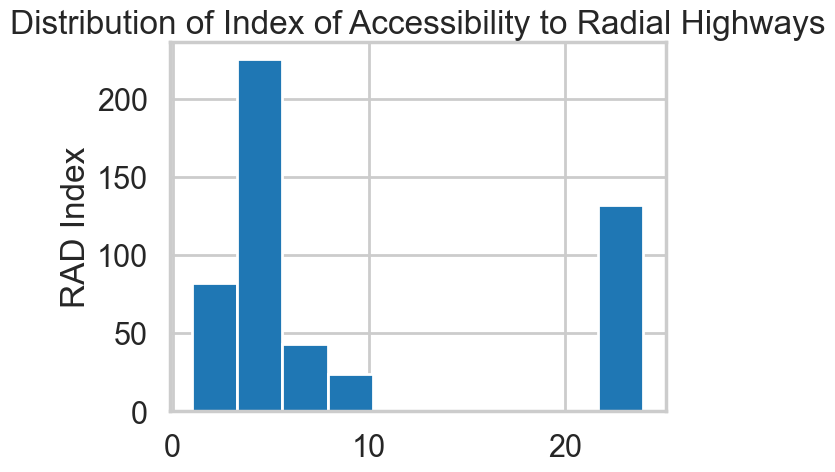

In [ ]:
plt.hist(bos['RAD'])
plt.ylabel('RAD Index')
plt.title('Distribution of Index of Accessibility to Radial Highways')
# That peak at 24 seems very suspicous.  Let's look at the overlap between residuals and RAD.

In [115]:
bos_rad = bos[bos['RAD'] == 24]
bos_rad.shape


(132, 17)

In [ ]:
bos_50_old = bos[(bos['PRICE'] == 50) & (bos['AGE'] > 85) & (bos['RAD'] == 24)]
bos_50_old
# This combination seems closer to be an explanation - the houses that are 50,000 dollars and over 85 years old tend to have large residuals and have RAD = 24.  I'm not sure why there are two
# outliers that are not expensive, but this is enough of a story to justify removing the outliers.
# I'm still concerned about why all the outliers are from the same part of the data frame, and what's special about 366 that it was skipped.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CRIM_log,m_residual,m_leverage
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,1.588872,39.433139,0.008909
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,1.735186,23.841226,0.002613
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,1.877748,20.810224,0.004122
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,2.222708,28.091911,0.001995
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,2.112302,31.195731,0.002649


Text(0.5, 1.0, 'Residuals vs Leverage Plot')

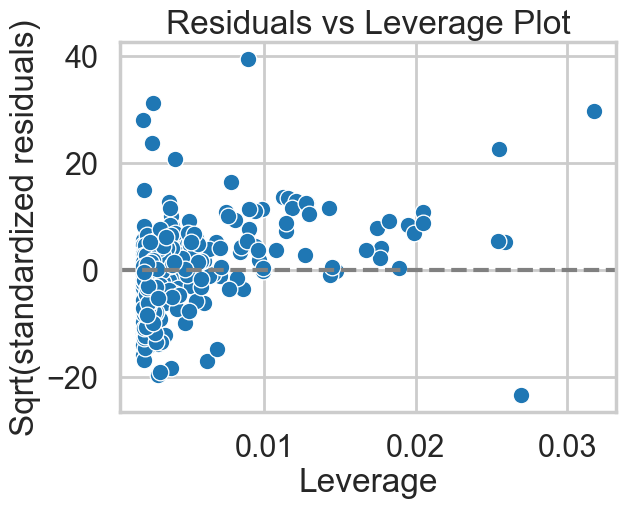

In [106]:
# Construct a leverage plot and identify high leverage points in the model.
influence = m.get_influence()
leverage = influence.hat_matrix_diag
sns.scatterplot(x=leverage, y=m.resid)
plt.axhline(y=0, color='grey', linestyle='dashed')
plt.xlabel('Leverage')
plt.ylabel('Sqrt(standardized residuals)')
plt.title('Residuals vs Leverage Plot')


In [ ]:
bos['m_leverage'] = influence.hat_matrix_diag
bos_leverage = bos[bos['m_leverage'] > .0225]
bos_leverage
# These houses are also old and have EITHER PRICE = 50 OR RAD = 24.  Clearly there is something about the intersection of these three varialble that is throuwing off the model.  
# Interstingly, the two houses that were inexpensive outliers are in this list as well, which I think helps explain their place in the outlier table.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CRIM_log,m_residual,m_leverage
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0,-0.640688,5.254720,0.025864
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0,-0.491775,5.445864,0.025455
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,1.245387,-23.345896,0.026953
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,1.516417,29.758011,0.031732
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,2.604333,22.609174,0.025499


In [ ]:
# Remove the outliers and high leverage points from your model and run the regression again.
bos_cut  = bos[(bos['m_residual'] <= 20) & (bos['m_leverage'] <= 0.0225)]
m_cut = ols('PRICE ~ RM',bos_cut).fit()
m_cut.summary()
#Conclusion, the F-statistic is up to 697.9, which is the highest we have had.  The R2 is still at aout 59%, which is equivalent to the highest any of the models have gotten.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     697.9
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.56e-96
Time:                        21:21:02   Log-Likelihood:                -1557.0
No. Observations:                 496   AIC:                             3118.
Df Residuals:                     494   BIC:                             3126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.1443      2.409    -17.083      0.000     -45.877     -36.412
RM            10.0739      0.381     26.417      0.000       9.325      10.823
==============================================================================
Omnibus:                       36.000   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.028
Skew:                          -0.561   Prob(JB):                     1.37e-11
Kurtosis:                       4.077   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""